<a href="https://colab.research.google.com/github/IbrahimEnouali/EC-DataScience-Coursework/blob/main/Graph-Analytics/Node_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Réseaux de neurones graphiques.

Dans ce TP, on va appliquer les concepts d'extraction de caractéristiques et de node embedding vus en cours sur un dataset classique [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).



# Représentation graphique avec networkx


In [ ]:
import networkx as nx

## Zachary's karate club network

Zachary's karate club est un graphe décrivant un réseau social de 34 membres d'un club de karaté. Les liens représentent les interactions entre les membres en dehors du club.

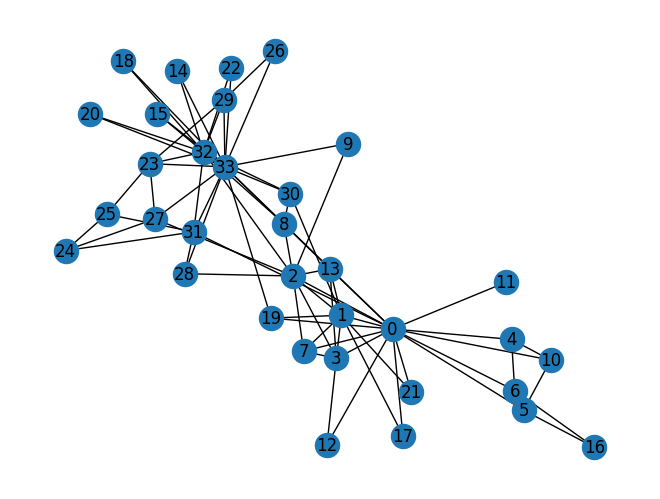

In [ ]:
G = nx.karate_club_graph()

nx.draw(G, with_labels = True)

# Graphe en Tenseur

Nous allons transformer le graphe $G$ en tenseur Pytorch.

In [ ]:
import torch

## Liste des arêtes positives du Karaté club en format `torch.LongTensor`.

In [ ]:
def graph_to_edge_list(G):
  # Cette fonction retourne la liste des arêtes d'un graphe sous forme
  # de couplet composé de deux noeuds.
  ############# Code ############
  edge_list = []

  for edge in G.edges():
    edge_list.append(edge)
  #########################################
  return edge_list

def edge_list_to_tensor(edge_list):

  # Cette fonction transforme un liste d'arêtes en Tenseur Pytorch
  # de dimension [2 x len(edge_list)]

  edge_index = torch.tensor([])

  ############# Code ############
  edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
print(pos_edge_list)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print(pos_edge_index)
print("La dimension de pos_edge_index est : {}".format(pos_edge_index.shape))
print("La somme des valeurs de pos_edge_index : {}".format(torch.sum(pos_edge_index)))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23



## Liste des arêtes négatives.

In [ ]:
import random

def sample_negative_edges(G, num_positive_samples):

  # Cette fonction retourne la liste des arêtes négatives.

  neg_edge_list = []

  ############# Code ############
  for _ in range(num_positive_samples):
    nodes = random.sample(G.nodes(), 2)
    while G.has_edge(nodes[0], nodes[1]):
      nodes = random.sample(G.nodes(), 2)
    neg_edge_list.append((nodes[0], nodes[1]))
  ###############################

  return neg_edge_list

# Echantillon de 78 arêtes négatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Convertir la liste des arêtes négatives en tenseur
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("Le tenseur neg_edge_index est de dimension {}".format(neg_edge_index.shape))

Le tenseur neg_edge_index est de dimension torch.Size([2, 78])


<ipython-input-8-30fa76e9cddf>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes = random.sample(G.nodes(), 2)
<ipython-input-8-30fa76e9cddf>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes = random.sample(G.nodes(), 2)


In [ ]:
len(neg_edge_list)

78

# Node Embeddings

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

On va appliquer à cela au jeu de données Zachary's karaté club.


*   On veut associer un vecteur de dimension 16 à chaque noeud du graphe.
*   on veut initialiser la matrice avec une distribution uniforme dans $[0, 1]$ en utilisant [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).



In [ ]:
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):

  # Ecrire une fonction qui implémente la matrice d'embeddings pour les noeuds.
  # La fonction doit retourner un embedding de format torch.nn initalisé selon
  # une loi uniforme dans [0,1].

  emb = None

  ############# Code ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  shape = emb.weight.data.shape
  emb.weight.data = torch.rand(shape)
  ###############################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

print("Embedding: {}".format(emb))

print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualisation des embeddings

Nous allons projet les embeddings inialisés ci-dessous en deux dimensions afin de les visualiser.

In [ ]:
from sklearn.decomposition import PCA
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

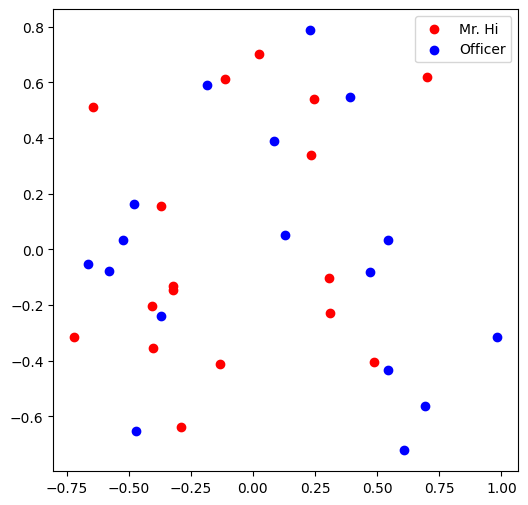

In [ ]:
visualize_emb(emb)

## Calcul des embeddings par descente du gradient.

In [ ]:
from torch.optim import SGD

def accuracy(pred, label):
  accu = 0.0
  accu = torch.sum(torch.round(pred) == label) / pred.shape[0]
  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  epochs = 500
  learning_rate = 0.1
  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
  for i in range(epochs):
    ############# Your code here ############
    optimizer.zero_grad()
    node_emb = emb(train_edge)
    dot_product = torch.sum(node_emb[0] * node_emb[1], -1)
    result = sigmoid(dot_product)
    loss = loss_fn(result, train_label)
    print("Epoch:", i, "Loss:", loss.item(),
          "Acc:", accuracy(result, train_label).item())
    loss.backward()
    optimizer.step()
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch: 0 Loss: 2.035423994064331 Acc: 0.5
Epoch: 1 Loss: 2.0201478004455566 Acc: 0.5
Epoch: 2 Loss: 1.9913877248764038 Acc: 0.5
Epoch: 3 Loss: 1.9509762525558472 Acc: 0.5
Epoch: 4 Loss: 1.900740385055542 Acc: 0.5
Epoch: 5 Loss: 1.8424679040908813 Acc: 0.5
Epoch: 6 Loss: 1.7778830528259277 Acc: 0.5
Epoch: 7 Loss: 1.7086297273635864 Acc: 0.5
Epoch: 8 Loss: 1.6362537145614624 Acc: 0.5
Epoch: 9 Loss: 1.5621912479400635 Acc: 0.5
Epoch: 10 Loss: 1.487755298614502 Acc: 0.5
Epoch: 11 Loss: 1.4141205549240112 Acc: 0.5
Epoch: 12 Loss: 1.3423103094100952 Acc: 0.5
Epoch: 13 Loss: 1.2731822729110718 Acc: 0.5
Epoch: 14 Loss: 1.207419991493225 Acc: 0.5
Epoch: 15 Loss: 1.145524501800537 Acc: 0.5
Epoch: 16 Loss: 1.08782160282135 Acc: 0.5
Epoch: 17 Loss: 1.0344713926315308 Acc: 0.49358972907066345
Epoch: 18 Loss: 0.985489547252655 Acc: 0.5128205418586731
Epoch: 19 Loss: 0.9407743811607361 Acc: 0.5384615659713745
Epoch: 20 Loss: 0.9001354575157166 Acc: 0.557692289352417
Epoch: 21 Loss: 0.8633220195770264

## Visualisation des embeddings calculés

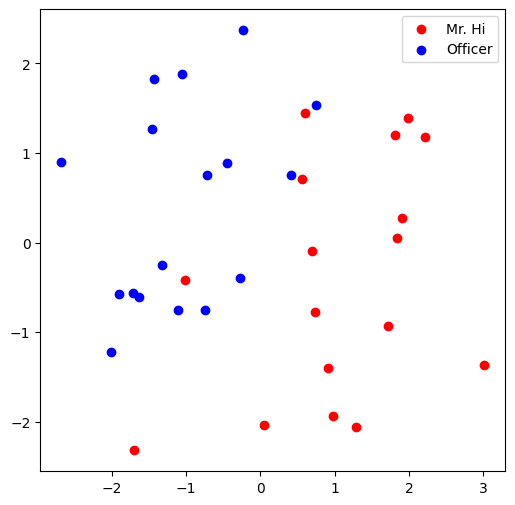

In [ ]:
visualize_emb(emb)